In [22]:
import os
os.environ['QIBOLAB_PLATFORMS'] = "D:/Code/NTU-control/SC_qubit_control_simulations_NTU/src/Qibo/my_platform.py"

[Qibo 0.2.2|INFO|2023-11-24 12:29:16]: Loading platform dummy


[Qibo 0.2.2|INFO|2023-11-24 12:29:16]: Minimal execution time (sweep): 0.8200000000000001


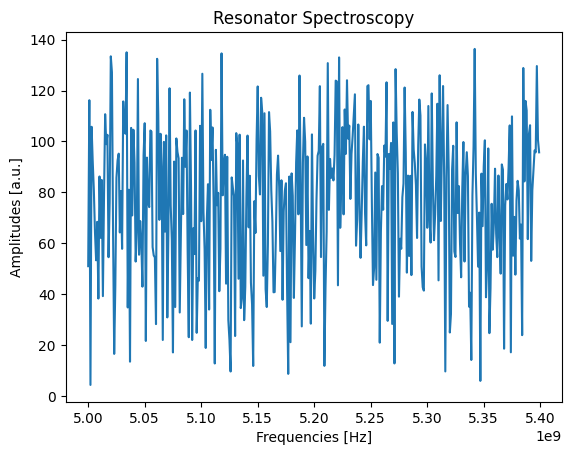

In [23]:
import numpy as np
import matplotlib.pyplot as plt

from qibolab import create_platform
from qibolab.pulses import PulseSequence
from qibolab.sweeper import Sweeper, SweeperType, Parameter
from qibolab.execution_parameters import (
    ExecutionParameters,
    AveragingMode,
    AcquisitionType,
)

# load the platform from ``dummy.py`` and ``dummy.yml``
platform = create_platform("dummy")

# define the pulse sequence
sequence = PulseSequence()
ro_pulse = platform.create_MZ_pulse(qubit=0, start=0)
sequence.add(ro_pulse)

# define a sweeper for a frequency scan
sweeper = Sweeper(
    parameter=Parameter.frequency,
    values=np.arange(-2e8, +2e8, 1e6),
    pulses=[ro_pulse],
    type=SweeperType.OFFSET,
)

# perform the experiment using specific options
options = ExecutionParameters(
    nshots=1000,
    relaxation_time=50,
    averaging_mode=AveragingMode.CYCLIC,
    acquisition_type=AcquisitionType.INTEGRATION,
)

results = platform.sweep(sequence, options, sweeper)

# plot the results
amplitudes = results[ro_pulse.serial].magnitude
frequencies = np.arange(-2e8, +2e8, 1e6) + ro_pulse.frequency

plt.title("Resonator Spectroscopy")
plt.xlabel("Frequencies [Hz]")
plt.ylabel("Amplitudes [a.u.]")

plt.plot(frequencies, amplitudes)